In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import math
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pickle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [3]:
Dataset1 = pd.read_pickle('Dataset1.pkl')

In [4]:
Dataset1['middle_name_distance'] = Dataset1['middle_name_distance'].replace(r'^\s*$', np.NaN, regex=True)

In [5]:
Dataset1['middle_name_distance'] = Dataset1['middle_name_distance'].astype(float)
Dataset1.drop(columns=['check_username'], inplace=True)

In [6]:
Dataset1

,user_id,onboarding_datetime,onboarding_date,fraud_flag,email_length,check_initials,vowels_count,vowels_ratio,consecutive_letters_count,total_consecutive_letters_length,max_consecutive_letters_length,total_digits,numeric_ratio,numeric_count,check_phonenumber,first_name_distance,middle_name_distance,last_name_distance,full_name_distance,domain,email_length_flag,vowels_ratio_flag,vowels_count_flag,consecutive_letters_count_flag,total_consecutive_letters_length_flag,max_consecutive_letters_length_flag,numeric_ratio_flag,numeric_count_flag,first_name_levenshtein_cutoff_flag,last_name_levenshtein_cutoff_flag,full_name_levenshtein_cutoff_flag,check_username_flag,total_risk_score,total_risk_score_weighted,len_unique_words,len_1,len_2,len_3,len_4,total_len,line_1_word_count,line_2_word_count,line_3_word_count,landmark_word_count,len_words,only_numeric_flag,no_numeric_flag,proportion_of_unique_words,numbers,letters,spaces,max_frequency_single_word,ip_rank,block3_rank,city,country,comm_city,comm_pincode,income_slab,email_verified_flag,time_from_install_to_onboarding,error_count_ob,aadhar_errors_count,aadhar_error_type1_count,aadhar_error_type1_flag,aadhar_error_type2_count,aadhar_error_type2_flag,aadhar_error_type3_count,aadhar_error_type3_flag,aadhar_error_type4_count,aadhar_error_type4_flag,aadhar_error_type5_count,aadhar_error_type5_flag,aadhar_error_type6_count,aadhar_error_type6_flag,aadhar_error_type7_count,aadhar_error_type7_flag,aadhar_error_flag,pan_errors_count,pan_error_type1_count,pan_error_type1_flag,pan_error_type2_count,pan_error_type2_flag,pan_error_type3_count,pan_error_type3_flag,pan_error_type4_count,pan_error_type4_flag,pan_error_flag,mobile_errors_count,mobile_error_type1_count,mobile_error_type1_flag,mobile_error_type2_count,mobile_error_type2_flag,mobile_error_type3_count,mobile_error_type3_flag,mobile_error_type4_count,mobile_error_type4_flag,mobile_error_type5_count,mobile_error_type5_flag,mobile_error_flag,back_page_clicked_count,merged_back_page_flag,ver_deg_flag,num_app_installed,flag_multiple_installation,vers_d2,vers_d3,vers_d2_flag,vers_d3_flag,carrier,device,os,platform,region,start_version,version,mname_errors_count,mname_error_flag,count_nominee_later,flag_nominee_not_filled,num_address_lines_filled,ckyc_occupation,ckyc_mother_name,mother_name_fake_flag,dv_flag,flag_mname_not_filled,aadhar_cb_dob_match_flag,comm_aadhar_pincode_match_flag
0,00002718-fcb3-450f-aa13-fa3da58a4bac,2021-11-17 13:10:32,2021-11-17 00:00:00,0.0,18,0,5,33.333333,0,0,1,3,16.666667,3,0,1.400000,NaN,1.600000,1.000000,gmail.com,0,0,0,0,0,0,0,0,0,1,0,0,1,0,5,22,1,1,12,36,3,0,0,2,5,0,1,100.0,0,31,8,1,1.0,7.0,Ahmedabad,India,Junagadh,362001.0,GT5LT10,0.0,7.498167,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0,0,Jio 4G,Samsung Galaxy Phone,android 10,Android,Gujarat,1.4.46,1.4.46,0.0,0,0.0,0,2,Salaried,anishabanu,0,0,0,0,1
1,0000bb10-a35a-41fc-ba00-19cb45a0afd6,2021-09-06 09:20:54,2021-09-06 00:00:00,0.0,15,0,6,54.545455,1,2,2,4,26.666667,4,0,1.454545,1.636364,1.818182,1.680000,gmail.com,0,0,0,0,0,0,0,0,0,1,1,1,2,14,3,21,1,1,1,24,3,0,0,0,3,0,1,100.0,0,19,8,1,1.0,2.0,Bengaluru,India,Haveri,581110.0,GT0LT1,1.0,663.902883,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0,0,AIRTEL,Redmi Phone,android 9,Android,Karnataka,1.4.28,1.5.4,0.0,0,0.0,0,1,Business,jianabbi,0,0,0,0,1
2,000155fa-a7f7-4d20-958f-08f6d4ed4b09,2021-11-18 22:16:27,2021-11-18 00:00:00,0.0,15,0,4,30.769231,0,0,1,2,13.333333,2,0,1.384615,NaN,1.846154,1.384615,gmail.com,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,25,1,1,11,38,3,0,0,1,4,0,0,100.0,3,30,7,1,1.0,36.0,Hyderabad,India,Nizamabad,503102.0,GT0LT1,0.0,19.464300,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0

In [7]:
list(Dataset1.columns)

['user_id',
 'onboarding_datetime',
 'onboarding_date',
 'fraud_flag',
 'email_length',
 'check_initials',
 'vowels_count',
 'vowels_ratio',
 'consecutive_letters_count',
 'total_consecutive_letters_length',
 'max_consecutive_letters_length',
 'total_digits',
 'numeric_ratio',
 'numeric_count',
 'check_phonenumber',
 'first_name_distance',
 'middle_name_distance',
 'last_name_distance',
 'full_name_distance',
 'domain',
 'email_length_flag',
 'vowels_ratio_flag',
 'vowels_count_flag',
 'consecutive_letters_count_flag',
 'total_consecutive_letters_length_flag',
 'max_consecutive_letters_length_flag',
 'numeric_ratio_flag',
 'numeric_count_flag',
 'first_name_levenshtein_cutoff_flag',
 'last_name_levenshtein_cutoff_flag',
 'full_name_levenshtein_cutoff_flag',
 'check_username_flag',
 'total_risk_score',
 'total_risk_score_weighted',
 'len_unique_words',
 'len_1',
 'len_2',
 'len_3',
 'len_4',
 'total_len',
 'line_1_word_count',
 'line_2_word_count',
 'line_3_word_count',
 'landmark_word_

In [8]:
#Dataset1.income_slab.value_counts()

In [9]:
Dataset1.rename(columns = {
'no_numeric_flag' : 'add_no_numeric_flag',
'check_initials' : 'email_check_initials',
'proportion_of_unique_words' : 'add_proportion_of_unique_words',
'domain' : 'email_domain',
'numeric_count_flag': 'email_numeric_count_flag',
'full_name_distance' : 'email_full_name_distance',
'numeric_ratio' : 'email_numeric_ratio',
'vowels_ratio_flag' : 'email_vowels_ratio_flag',
'numeric_ratio_flag' : 'email_numeric_ratio_flag',
'first_name_distance' : 'email_first_name_distance',
'first_name_levenshtein_cutoff_flag' : 'email_first_name_levenshtein_cutoff_flag',
'vowels_ratio' : 'email_vowels_ratio',
'full_name_levenshtein_cutoff_flag' : 'email_full_name_levenshtein_cutoff_flag',
'vowels_count' : 'email_vowels_count',
'numeric_count' : 'email_numeric_count',
'len_unique_words' : 'add_len_unique_words',
'len_words' : 'add_len_words',
'middle_name_distance' : 'email_middle_name_distance',
'total_digits' : 'email_total_digits',
'total_len' : 'add_total_len',
'len_1' : 'add_len_1',
'letters' : 'add_letters',
'spaces' : 'add_spaces',
'check_username_flag' : 'email_check_username_flag',
'line_1_word_count' : 'add_line_1_word_count',
'email_length' : 'email_length',
'max_frequency_single_word' : 'add_max_frequency_single_word',
'numbers' : 'add_numbers',
'total_consecutive_letters_length' : 'email_total_consecutive_letters_length',
'consecutive_letters_count' : 'email_consecutive_letters_count',
'landmark_word_count' : 'add_landmark_word_count',
'max_consecutive_letters_length' : 'email_max_consecutive_letters_length',
'only_numeric_flag' : 'add_only_numeric_flag',
'len_3' : 'add_len_3',
'check_phonenumber' : 'email_check_phonenumber',
'line_3_word_count' : 'add_line_3_word_count',
'last_name_distance': 'email_last_name_distance',
'vowels_count_flag' : 'email_vowels_count_flag',
'consecutive_letters_count_flag' : 'email_consecutive_letters_count_flag',
'total_consecutive_letters_length_flag' : 'email_total_consecutive_letters_length_flag',
'max_consecutive_letters_length_flag' : 'email_max_consecutive_letters_length_flag',
'last_name_levenshtein_cutoff_flag' : 'email_last_name_levenshtein_cutoff_flag',
'len_2' : 'add_len_2',
'len_4': 'add_len_4',
'line_2_word_count' : 'add_line_2_word_count'
}, inplace = True)

In [10]:
Dataset1.onboarding_date.min()

'2021-08-01 00:00:00'

In [11]:
data = Dataset1[[
'user_id',
#'email_length',
#'email_check_username',
'email_check_initials',
#'email_vowels_count',
'email_vowels_ratio',
'email_consecutive_letters_count',
'email_total_consecutive_letters_length',
'email_max_consecutive_letters_length',
'email_total_digits',
'email_numeric_ratio',
#'email_numeric_count',
'email_check_phonenumber',
'email_first_name_distance',
'email_middle_name_distance',
#'email_last_name_distance',
'email_full_name_distance',
'email_domain',
#'email_length_flag',
'email_vowels_ratio_flag',
#'email_vowels_count_flag',
#'email_consecutive_letters_count_flag',
#'email_total_consecutive_letters_length_flag',
#'email_max_consecutive_letters_length_flag',
'email_numeric_ratio_flag',
'email_numeric_count_flag',
'email_first_name_levenshtein_cutoff_flag',
#'email_last_name_levenshtein_cutoff_flag',
'email_full_name_levenshtein_cutoff_flag',
'email_check_username_flag',
'add_len_unique_words',
'add_len_1',
#'add_len_2',
'add_len_3',
#'add_len_4',
'add_total_len',
'add_line_1_word_count',
#'add_line_2_word_count',
'add_line_3_word_count',
'add_landmark_word_count',
'add_len_words',
'add_only_numeric_flag',
'add_no_numeric_flag',
'add_proportion_of_unique_words',
'add_numbers',
'add_letters',
'add_spaces',
'add_max_frequency_single_word',
'fraud_flag',
'email_verified_flag',
'city', 
'country', 
'comm_city', 
'comm_pincode',
'income_slab',
'platform',
'region',
'num_address_lines_filled',
'ckyc_occupation',
'aadhar_cb_dob_match_flag',
#'comm_aadhar_pincode_match_flag'
]]

In [12]:
data['fraud_flag'].mean()*100

3.637675929267412

In [13]:
data['fraud_flag'].value_counts()

0.0    186914
1.0      7056
Name: fraud_flag, dtype: int64

In [14]:
Y = pd.DataFrame((data['fraud_flag']))
X = data.drop(["fraud_flag", "user_id"], axis = 1)

In [77]:
conda install -c conda-forge lightgbm

In [16]:
import lightgbm
from lightgbm import LGBMClassifier

In [17]:
import sklearn.metrics

In [18]:
from sklearn.metrics import mean_absolute_percentage_error
import lightgbm

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#X['bid_email_exists']= label_encoder.fit_transform(X['bid_email_exists'])
X['city']= label_encoder.fit_transform(X['city'])
X['country']= label_encoder.fit_transform(X['country'])
X['email_domain']= label_encoder.fit_transform(X['email_domain'])
X['income_slab']= label_encoder.fit_transform(X['income_slab'])
X['region']= label_encoder.fit_transform(X['region'])
X['comm_city']= label_encoder.fit_transform(X['comm_city'])
X['comm_pincode']= label_encoder.fit_transform(X['comm_pincode'])
X['platform']= label_encoder.fit_transform(X['platform'])
X['ckyc_occupation']= label_encoder.fit_transform(X['ckyc_occupation'])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y['fraud_flag'], test_size=0.25, random_state=1, stratify=Y['fraud_flag'])


## lgbm

### Feature Categories

In [21]:
results=pd.DataFrame()
results['features']=X.columns
results['feature_category'] = 'new'

In [22]:
#subsetter = np.where((results['features'].str.contains(r'bid')==True))
#for i in subsetter:
#    results.iloc[i,1] = 'bureau_intelligence_variable'
    
subsetter2 = np.where((results['features'].str.contains(r'add')==True))
for i in subsetter2:
    results.iloc[i,1] = 'internal_address_variable'

#subsetter3 = np.where((results['features'].str.contains(r'new')==True))
#for i in subsetter3:
#    results.iloc[i,1] = 'new_variable'

subsetter4 = np.where((results['features'].str.contains(r'email')==True) & (results['features'].str.contains(r'bid')==False) & (results['features'].str.contains(r'new')==False))
for i in subsetter4:
    results.iloc[i,1] = 'internal_email_variable'

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's binary_logloss: 0.141391
Training until validation scores don't improve for 16 rounds
[2]	valid_0's binary_logloss: 0.134377
[3]	valid_0's binary_logloss: 0.129309
[4]	valid_0's binary_logloss: 0.125983
[5]	valid_0's binary_logloss: 0.122324
[6]	valid_0's binary_logloss: 0.119967
[7]	valid_0's binary_logloss: 0.117359
[8]	valid_0's binary_logloss: 0.115813
[9]	valid_0's binary_logloss: 0.114409
[10]	valid_0's binary_logloss: 0.113149
[11]	valid_0's binary_logloss: 0.111711
[12]	valid_0's binary_logloss: 0.110861
[13]	valid_0's binary_logloss: 0.109967
[14]	valid_0's binary_logloss: 0.109095
[15]	valid_0's binary_logloss: 0.108328
[16]	valid_0's binary_logloss: 0.107651
[17]	valid_0

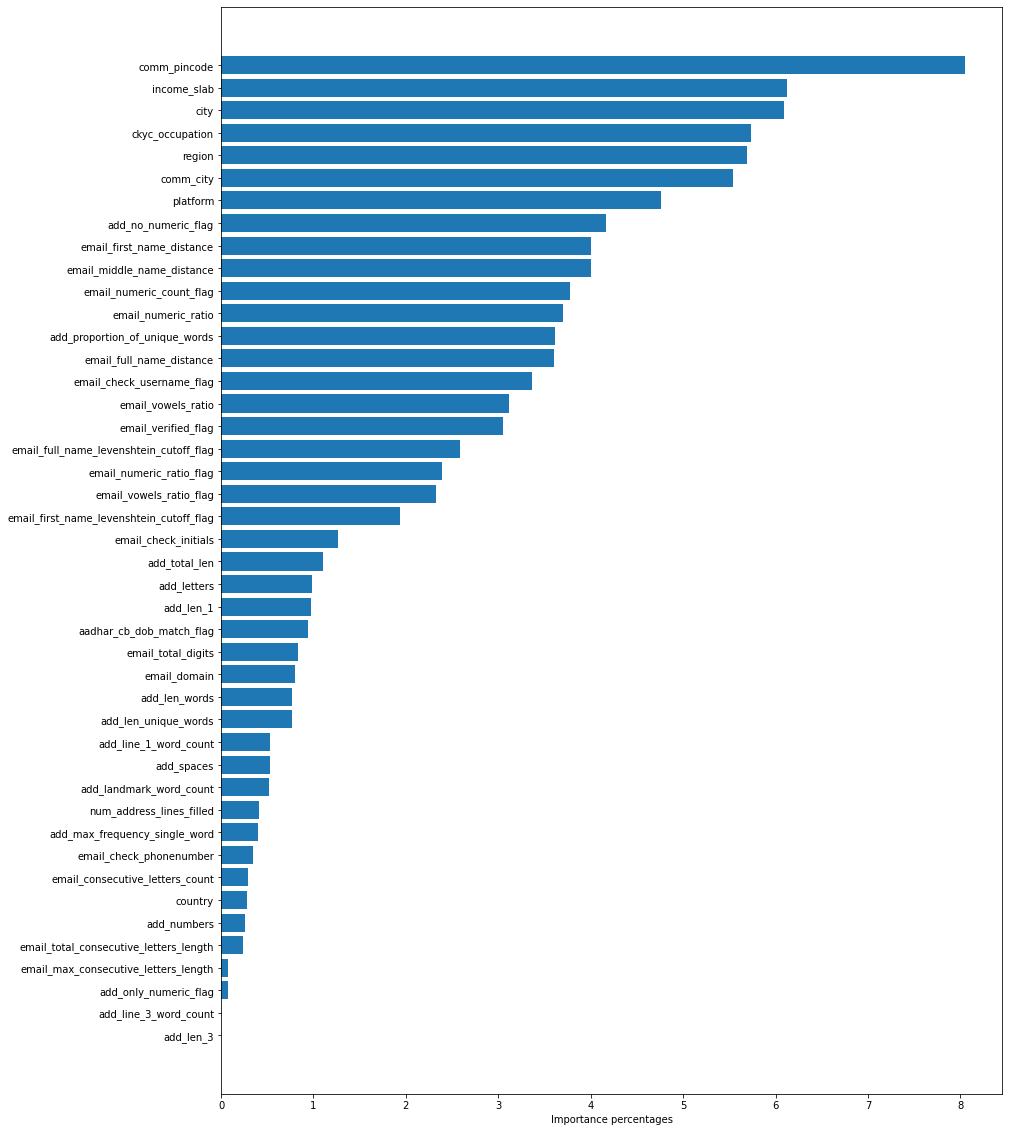

{'roc_auc_score_test': 0.9468971935396885, 'gini_train_gini': 0.9316310408950743, 'gini_test_gini': 0.893794387079377, 'logloss_test_logloss': 0.09053598959646504, 'logloss_train_logloss': 0.0771540117800265}


In [23]:
#learning_rate= [0.15, 0.1, 0.01],
               #gamma = [0.1, 0.5, 1, 1.5, 2, 10, 50, 100],
               #max_depth = [2, 4, 7,10 ,15, 18],
               #subsample = [0.4, 0.5, 0.6, 0.7, 0.8],
               #reg_alpha= [0, 0.5, 1, 20, 30],
               #reg_lambda = [1, 1.5, 2, 3, 20, 30],
               #n_estimators = [100, 250, 500])

model = LGBMClassifier(min_child_weight=2, feature_fraction=1, extra_trees=True, 
gamma= 15, subsample =0.8, reg_lambda = 8, reg_alpha = 0.5, n_estimators = 350, max_depth = 6, learning_rate = 0.15)  

model.fit(x_train, y_train,
early_stopping_rounds=16,
eval_set=[
    (x_test, y_test)
]);
    

train_pred=model.predict_proba(x_train)[:,1]
test_pred=model.predict_proba(x_test)[:,1]
    
    
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve, roc_auc_score, classification_report,
confusion_matrix, roc_curve, matthews_corrcoef, auc, log_loss)
    
def new_gini(a,b):
    auc_score = roc_auc_score(np.array(b), a)
    gini_full = 2*auc_score - 1
    gini = np.float64(gini_full)
    return gini
    
metrics = {
    #'acc_test' : accuracy_score(y_test, val_pred),
    #'f1_test' : f1_score(y_test, val_pred),
'roc_auc_score_test' : roc_auc_score(np.array(y_test), test_pred),
     
'gini_train_gini' : new_gini(train_pred, y_train),
'gini_test_gini' : new_gini(test_pred, y_test),
        
'logloss_test_logloss' : log_loss(y_true=y_test,y_pred=test_pred),
'logloss_train_logloss' : log_loss(y_true=y_train,y_pred=train_pred)
}
#plt.rcParams["figure.figsize"] = (14, 20)
#xgboost.plot_importance(model,importance_type='gain')   

results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=True,inplace=True)
results['imp_perc'] = (results['importances']/sum(results['importances']))*100
results

plt.figure(figsize=(14, 20))
ax = plt.barh(results['features'], results['imp_perc'])
plt.xlabel('Importance percentages')
plt.show()

print(metrics)

### Feature Importance

In [24]:
results.sort_values(by='importances',ascending=False,inplace=True)
results

,features,feature_category,importances,imp_perc
37,comm_pincode,new,780,8.051197
38,income_slab,new,593,6.120974
34,city,new,590,6.090008
42,ckyc_occupation,new,556,5.739059
40,region,new,551,5.687448
36,comm_city,new,537,5.542940
39,platform,new,461,4.758464
27,add_no_numeric_flag,internal_address_variable,404,4.170107
8,email_first_name_distance,internal_email_variable,388,4.004955
9,email_middle_name_distance,internal_email_variable,388,4.004955


In [25]:
category_imp = pd.DataFrame(results.groupby(['feature_category'])[['importances', 'imp_perc']].agg('sum'))
category_imp.sort_values(by='imp_perc',ascending=False,inplace=True)

In [26]:
category_imp.reset_index(inplace=True, drop=False)

In [27]:
category_imp

,feature_category,importances,imp_perc
0,new,4186,43.208092
1,internal_email_variable,4041,41.711396
2,internal_address_variable,1461,15.080512


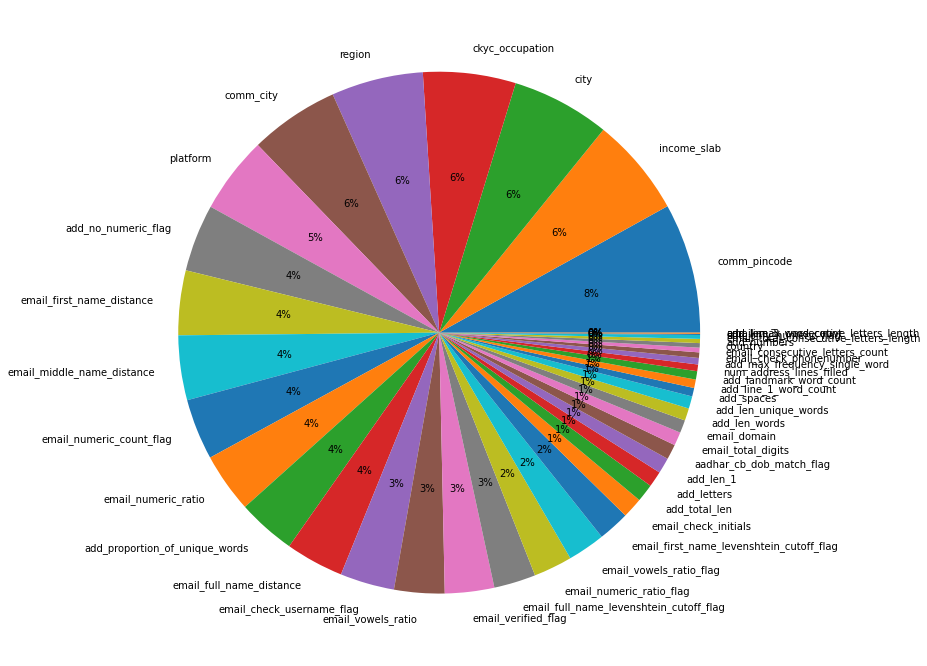

In [28]:
plt.figure(figsize=(12, 12))
ax = plt.pie(results['importances'], labels = results['features'], autopct = '%0.0f%%')
plt.show()

In [29]:
len(list(X.columns))

44

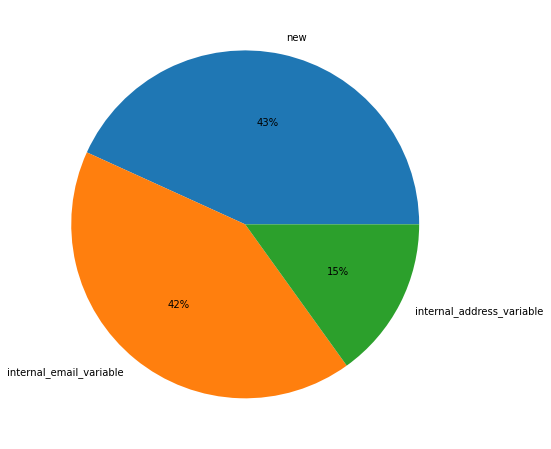

In [30]:
plt.figure(figsize=(8, 8))
ax = plt.pie(category_imp['importances'], labels = category_imp['feature_category'], autopct = '%0.0f%%')
plt.show()

### Capture rate, cumulative goods percentage

In [31]:
predictions_dev = train_pred
predictions_dev_test = test_pred
y_dev_train = y_train
#train[p] -- predic prob, train[f] -- actual flags
X_dev_train = x_train
y_dev_test = y_test
X_dev_test = x_test

In [32]:
train = pd.DataFrame()
train["p"] = predictions_dev
train["f"] = pd.DataFrame(y_dev_train).reset_index(drop = True)["fraud_flag"]

X_dev_train.reset_index(inplace = True)
X_dev_train["p"] = train["p"]
X_dev_train["f"] = train["f"]

### Deciles

In [33]:
X_dev_train['bin_rank'] = pd.qcut(X_dev_train['p'], 10, duplicates='drop')
cats, bins = pd.qcut(X_dev_train['p'], 10,duplicates='drop', retbins=True)
bins

array([1.08587336e-05, 2.53020528e-04, 4.76392298e-04, 8.24033531e-04,
       1.39764558e-03, 2.37735913e-03, 4.30312120e-03, 8.62052494e-03,
       2.16982591e-02, 1.01507019e-01, 9.04527314e-01])

In [34]:
def dev_dist(dist, X):
    dist["count"] = dist["f"]
    dist.drop(columns = ["f"], inplace = True)
    #dist["population"] = dist["count"][0]
    dist = dist.reset_index()
    k = dist.drop_duplicates(subset = "bin_rank")
    k.drop(["f"], axis = 1, inplace = True)
    k = k.rename(columns = {"count" : "goods"})
    k.reset_index(inplace = True)
    k.drop(["index"], axis = 1, inplace = True)
    k["population"] = X["bin_rank"].value_counts().to_frame().reset_index().sort_values(by = "index").reset_index()["bin_rank"]
    k["bads"] = k["population"] - k["goods"]
    k["bad %"] = k["bads"]/k["population"] * 100
    k = k.iloc[::-1]
    k = k.reset_index()
    k.drop("index", axis = 1, inplace = True)
    k["cumulative bads"] = 0
    k["cumulative bads"] = k["bads"].cumsum()
    k["cumulative population"] = k["population"].cumsum()
    k["cumulative goods"] = k["goods"].cumsum()
    k = k[["bin_rank", "population", "bads", "goods", "bad %", "cumulative population", "cumulative bads", "cumulative goods"]]
    k["capture rate"] = k["cumulative bads"] / np.sum(k["bads"]) * 100
    k["cum goods %"] = k["cumulative goods"] / np.sum(k["goods"]) * 100
    return k

In [35]:
dist = X_dev_train.groupby(["bin_rank"])["f"].value_counts().to_frame()

### Decile train

In [36]:
k = dev_dist(dist, X_dev_train)
k

,bin_rank,population,bads,goods,bad %,cumulative population,cumulative bads,cumulative goods,capture rate,cum goods %
0,"(0.102, 0.905]",14548,4659,9889,32.025021,14548,4659,9889,88.038549,7.054250
1,"(0.0217, 0.102]",14548,484,14064,3.326918,29096,5143,23953,97.184429,17.086707
2,"(0.00862, 0.0217]",14547,87,14460,0.598061,43643,5230,38413,98.828420,27.401648
3,"(0.0043, 0.00862]",14548,31,14517,0.213088,58191,5261,52930,99.414210,37.757249
4,"(0.00238, 0.0043]",14547,17,14530,0.116863,72738,5278,67460,99.735450,48.122124
5,"(0.0014, 0.00238]",14548,6,14542,0.041243,87286,5284,82002,99.848828,58.495559
6,"(0.000824, 0.0014]",14548,3,14545,0.020621,101834,5287,96547,99.905518,68.871135
7,"(0.000476, 0.000824]",14547,2,14545,0.013749,116381,5289,111092,99.943311,79.246710
8,"(0.000253, 0.000476]",14548,2,14546,0.013748,130929,5291,125638,99.981104,89.622998
9,"(-0.0009891, 0.000253]",14548,1,14547,0.006874,145477,5292,140185,100.000000,100.000000


In [37]:
test = pd.DataFrame()
test["p"] = predictions_dev_test
test["f"] = pd.DataFrame(y_dev_test).reset_index(drop = True)["fraud_flag"]

X_dev_test.reset_index(inplace = True)
X_dev_test["p"] = test["p"]
X_dev_test["f"] = test["f"]

In [38]:
X_dev_test['bin_rank'] = pd.qcut(X_dev_test['p'], 10, duplicates='drop')
cats, bins = pd.qcut(X_dev_test['p'], 10, duplicates='drop', retbins=True)
bins

array([1.39025038e-05, 2.54695910e-04, 4.81938768e-04, 8.34705442e-04,
       1.42479334e-03, 2.38059453e-03, 4.31612433e-03, 8.59625814e-03,
       2.22341680e-02, 1.07510483e-01, 8.49287885e-01])

In [39]:
dist = X_dev_test.groupby(["bin_rank"])["f"].value_counts().to_frame()

### Decile Test

In [40]:
k = dev_dist(dist, X_dev_test)
k

,bin_rank,population,bads,goods,bad %,cumulative population,cumulative bads,cumulative goods,capture rate,cum goods %
0,"(0.108, 0.849]",4850,1426,3424,29.402062,4850,1426,3424,80.839002,7.327356
1,"(0.0222, 0.108]",4849,246,4603,5.073211,9699,1672,8027,94.784580,17.177770
2,"(0.0086, 0.0222]",4849,51,4798,1.051763,14548,1723,12825,97.675737,27.445484
3,"(0.00432, 0.0086]",4849,20,4829,0.412456,19397,1743,17654,98.809524,37.779537
4,"(0.00238, 0.00432]",4849,11,4838,0.226851,24246,1754,22492,99.433107,48.132851
5,"(0.00142, 0.00238]",4850,4,4846,0.082474,29096,1758,27338,99.659864,58.503285
6,"(0.000835, 0.00142]",4849,3,4846,0.061868,33945,1761,32184,99.829932,68.873719
7,"(0.000482, 0.000835]",4849,1,4848,0.020623,38794,1762,37032,99.886621,79.248432
8,"(0.000255, 0.000482]",4849,2,4847,0.041246,43643,1764,41879,100.000000,89.621006
9,"(-0.0009861, 0.000255]",4850,0,4850,0.000000,48493,1764,46729,100.000000,100.000000


## Top 10 Percentiles

In [41]:
X_dev_train['bin_rank'] = pd.qcut(X_dev_train['p'], 100, duplicates='drop')
cats, bins = pd.qcut(X_dev_train['p'], 100, duplicates='drop', retbins=True)
bins

array([1.08587336e-05, 7.64887167e-05, 1.00848992e-04, 1.22076308e-04,
       1.42099004e-04, 1.60247975e-04, 1.78082247e-04, 1.96428242e-04,
       2.14308792e-04, 2.33501548e-04, 2.53020528e-04, 2.73364475e-04,
       2.94632091e-04, 3.14281763e-04, 3.34972625e-04, 3.56472332e-04,
       3.77965643e-04, 4.00690913e-04, 4.25324883e-04, 4.49387067e-04,
       4.76392298e-04, 5.04574208e-04, 5.33550887e-04, 5.63065494e-04,
       5.92939427e-04, 6.26298814e-04, 6.62616148e-04, 6.99770146e-04,
       7.37231920e-04, 7.80020169e-04, 8.24033531e-04, 8.68476820e-04,
       9.15308079e-04, 9.65277473e-04, 1.01819443e-03, 1.07353320e-03,
       1.13043586e-03, 1.19302596e-03, 1.25759790e-03, 1.32300507e-03,
       1.39764558e-03, 1.47322745e-03, 1.55431785e-03, 1.63771607e-03,
       1.72655738e-03, 1.81953167e-03, 1.92002527e-03, 2.02767188e-03,
       2.13447809e-03, 2.25189406e-03, 2.37735913e-03, 2.51352222e-03,
       2.66148993e-03, 2.81677669e-03, 2.98935828e-03, 3.16546731e-03,
      

In [42]:
dist = X_dev_train.groupby(["bin_rank"])["f"].value_counts().to_frame()

In [43]:
k = dev_dist(dist, X_dev_train)
k.head(10)
#train

,bin_rank,population,bads,goods,bad %,cumulative population,cumulative bads,cumulative goods,capture rate,cum goods %
0,"(0.498, 0.905]",1455,423,1032,29.072165,1455,423,1032,9.215686,0.732502
1,"(0.415, 0.498]",1455,681,774,46.804124,2910,1104,1806,24.052288,1.281878
2,"(0.354, 0.415]",1455,650,805,44.673540,4365,1754,2611,38.213508,1.853258
3,"(0.306, 0.354]",1455,492,963,33.814433,5820,2246,3574,48.932462,2.536785
4,"(0.259, 0.306]",1454,455,999,31.292985,7274,2701,4573,58.845316,3.245864
5,"(0.219, 0.259]",1455,369,1086,25.360825,8729,3070,5659,66.884532,4.016694
6,"(0.185, 0.219]",1455,297,1158,20.412371,10184,3367,6817,73.355120,4.838630
7,"(0.152, 0.185]",1455,237,1218,16.288660,11639,3604,8035,78.518519,5.703152
8,"(0.125, 0.152]",1454,210,1244,14.442916,13093,3814,9279,83.093682,6.586129
9,"(0.102, 0.125]",1455,143,1312,9.828179,14548,3957,10591,86.209150,7.517372


In [44]:
X_dev_test['bin_rank'] = pd.qcut(X_dev_test['p'], 100, duplicates='drop')
cats, bins = pd.qcut(X_dev_test['p'], 100, duplicates='drop', retbins=True)
bins

array([1.39025038e-05, 7.80023000e-05, 1.01251518e-04, 1.20841839e-04,
       1.42625404e-04, 1.61146046e-04, 1.80393337e-04, 1.97578174e-04,
       2.15718756e-04, 2.35285813e-04, 2.54695910e-04, 2.74287176e-04,
       2.96066384e-04, 3.16333311e-04, 3.36859410e-04, 3.58970025e-04,
       3.81117266e-04, 4.03851070e-04, 4.29273056e-04, 4.55315027e-04,
       4.81938768e-04, 5.10094439e-04, 5.38994688e-04, 5.68571610e-04,
       5.99768250e-04, 6.35868983e-04, 6.72561624e-04, 7.09180064e-04,
       7.47717660e-04, 7.92258541e-04, 8.34705442e-04, 8.82905330e-04,
       9.32129171e-04, 9.86097098e-04, 1.04065142e-03, 1.09198847e-03,
       1.14773247e-03, 1.20808822e-03, 1.27857514e-03, 1.34737360e-03,
       1.42479334e-03, 1.49961552e-03, 1.58103292e-03, 1.66356154e-03,
       1.74828965e-03, 1.83700648e-03, 1.93112246e-03, 2.03557802e-03,
       2.13658560e-03, 2.25416296e-03, 2.38059453e-03, 2.50696939e-03,
       2.64284439e-03, 2.80048826e-03, 2.96949865e-03, 3.14693335e-03,
      

In [45]:
dist = X_dev_test.groupby(["bin_rank"])["f"].value_counts().to_frame()

In [46]:
k = dev_dist(dist, X_dev_test)
k.head(10)
#test

,bin_rank,population,bads,goods,bad %,cumulative population,cumulative bads,cumulative goods,capture rate,cum goods %
0,"(0.482, 0.849]",485,229,256,47.216495,485,229,256,12.981859,0.547840
1,"(0.4, 0.482]",485,184,301,37.938144,970,413,557,23.412698,1.191979
2,"(0.347, 0.4]",485,181,304,37.319588,1455,594,861,33.673469,1.842539
3,"(0.302, 0.347]",485,168,317,34.639175,1940,762,1178,43.197279,2.520918
4,"(0.262, 0.302]",485,129,356,26.597938,2425,891,1534,50.510204,3.282758
5,"(0.224, 0.262]",485,146,339,30.103093,2910,1037,1873,58.786848,4.008218
6,"(0.19, 0.224]",485,101,384,20.824742,3395,1138,2257,64.512472,4.829977
7,"(0.159, 0.19]",485,130,355,26.804124,3880,1268,2612,71.882086,5.589677
8,"(0.13, 0.159]",485,94,391,19.381443,4365,1362,3003,77.210884,6.426416
9,"(0.108, 0.13]",485,64,421,13.195876,4850,1426,3424,80.839002,7.327356


In [47]:
print(metrics)

{'roc_auc_score_test': 0.9468971935396885, 'gini_train_gini': 0.9316310408950743, 'gini_test_gini': 0.893794387079377, 'logloss_test_logloss': 0.09053598959646504, 'logloss_train_logloss': 0.0771540117800265}


### ROC

In [78]:
pip install yellowbrick

In [49]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [50]:
from yellowbrick.classifier import ClassificationReport

In [51]:
classes = [1, 0]

In [52]:
from yellowbrick.classifier import ROCAUC

In [53]:
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve, roc_auc_score, classification_report,
    confusion_matrix, roc_curve, matthews_corrcoef, auc, log_loss)

In [54]:
x_train.columns

Index(['index', 'email_check_initials', 'email_vowels_ratio',
       'email_consecutive_letters_count',
       'email_total_consecutive_letters_length',
       'email_max_consecutive_letters_length', 'email_total_digits',
       'email_numeric_ratio', 'email_check_phonenumber',
       'email_first_name_distance', 'email_middle_name_distance',
       'email_full_name_distance', 'email_domain', 'email_vowels_ratio_flag',
       'email_numeric_ratio_flag', 'email_numeric_count_flag',
       'email_first_name_levenshtein_cutoff_flag',
       'email_full_name_levenshtein_cutoff_flag', 'email_check_username_flag',
       'add_len_unique_words', 'add_len_1', 'add_len_3', 'add_total_len',
       'add_line_1_word_count', 'add_line_3_word_count',
       'add_landmark_word_count', 'add_len_words', 'add_only_numeric_flag',
       'add_no_numeric_flag', 'add_proportion_of_unique_words', 'add_numbers',
       'add_letters', 'add_spaces', 'add_max_frequency_single_word',
       'email_verified_flag',

In [55]:
x_train_new = x_train.drop(columns=['index', 'p', 'f', 'bin_rank'])
x_test_new = x_test.drop(columns=['index', 'p', 'f', 'bin_rank'])

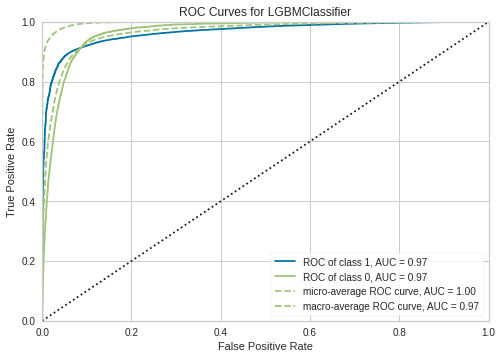

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [56]:
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(x_train_new, y_train)        # Fit the training data to the visualizer
visualizer.score(x_train_new, y_train)        # Evaluate the model on the train data
visualizer.show() 

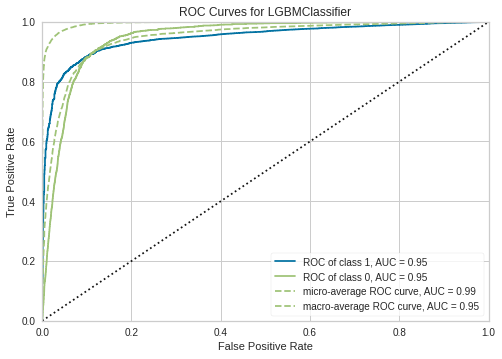

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(x_train_new, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test_new, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [ ]:
# Mapping user ids with predicted prob of fraud and actual fraud flags (rough)

In [58]:
y_train.mean()

0.036376884318483335

In [59]:
y_test.mean()

0.036376384220402944

In [60]:
y_train_actual =  pd.DataFrame(y_train)

In [61]:
y_train_actual

,fraud_flag
144720,0.0
56082,0.0
133177,0.0
164986,0.0
138894,1.0
...,...
105799,0.0
23666,0.0
137613,0.0
35944,0.0


In [62]:
x_train

,index,email_check_initials,email_vowels_ratio,email_consecutive_letters_count,email_total_consecutive_letters_length,email_max_consecutive_letters_length,email_total_digits,email_numeric_ratio,email_check_phonenumber,email_first_name_distance,email_middle_name_distance,email_full_name_distance,email_domain,email_vowels_ratio_flag,email_numeric_ratio_flag,email_numeric_count_flag,email_first_name_levenshtein_cutoff_flag,email_full_name_levenshtein_cutoff_flag,email_check_username_flag,add_len_unique_words,add_len_1,add_len_3,add_total_len,add_line_1_word_count,add_line_3_word_count,add_landmark_word_count,add_len_words,add_only_numeric_flag,add_no_numeric_flag,add_proportion_of_unique_words,add_numbers,add_letters,add_spaces,add_max_frequency_single_word,email_verified_flag,city,country,comm_city,comm_pincode,income_slab,platform,region,num_address_lines_filled,ckyc_occupation,aadhar_cb_dob_match_flag,p,f,bin_rank
0,144720,1,28.571429,0,0,1,1,12.500000,0,1.142857,NaN,1.363636,402,1,0,0,0,0,0,8,38,1,41,8,0,0,8,0,0,100.000000,1,30,13,1,0.0,363,22,1315,18,7,1,125,1,4,1,0.015162,0.0,"(0.0145, 0.016]"
1,56082,0,40.000000,0,0,1,4,44.444444,0,1.750000,NaN,1.785714,402,0,0,0,1,1,1,2,12,1,15,2,0,0,2,0,0,100.000000,1,9,7,1,0.0,560,22,445,13701,4,2,154,1,3,0,0.272781,0.0,"(0.259, 0.306]"
2,133177,0,33.333333,1,2,2,0,0.000000,0,1.555556,NaN,1.277778,402,0,0,0,1,0,0,13,43,1,63,10,0,3,13,0,0,100.000000,2,47,16,1,0.0,229,22,323,5819,7,0,106,2,0,1,0.003993,0.0,"(0.0038, 0.00404]"
3,164986,0,0.000000,0,0,1,8,88.888889,0,2.000000,NaN,1.933333,402,1,1,1,1,1,1,5,33,1,41,4,0,1,5,0,1,100.000000,0,36,8,1,1.0,977,22,1950,4144,7,0,22,2,4,1,0.183902,0.0,"(0.152, 0.185]"
4,138894,0,37.500000,0,0,1,3,27.272727,0,1.875000,NaN,1.750000,526,0,0,0,1,1,1,2,11,1,18,1,0,0,2,0,1,100.000000,0,16,5,1,0.0,977,22,272,715,7,0,22,2,0,1,0.622062,1.0,"(0.498, 0.905]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145472,105799,0,35.714286,1,2,2,3,17.647059,0,1.428571,NaN,1.000000,402,0,0,0,0,0,0,6,54,1,57,9,0,0,9,0,0,66.666667,2,40,14,3,0.0,977,22,1336,14175,4,0,22,1,0,0,0.041392,0.0,"(0.0412, 0.0485]"
145473,23666,1,0.000000,1,2,2,7,77.777778,0,1.833333,NaN,1.833333,402,1,1,1,1,1,1,6,41,1,44,6,0,0,6,0,1,100.000000,0,36,11,1,0.0,767,22,270,2408,0,2,183,1,5,0,0.000557,0.0,"(0.000534, 0.000563]"
145474,137613,0,42.857143,0,0,1,2,22.222222,0,2.000000,NaN,1.461538,402,0,0,0,1,0,0,4,15,1,31,2,0,2,4,0,1,100.000000,0,27,7,1,0.0,836,68,90,3765,4,2,54,2,0,1,0.031397,0.0,"(0.031, 0.0357]"
145475,35944,0,40.000000,0,0,1,0,0.000000,0,1.600000,NaN,1.333333,880,0,0,0,1,0,0,4,21,1,24,4,0,0,4,0,0,100.000000,5,11,9,1,0.0,914,22,571,33,4,0,125,1,3,1,0.012571,0.0,"(0.012, 0.0132]"


In [63]:
y_train_actual.reset_index(inplace = True, drop = True)

In [64]:
y_train_actual

,fraud_flag
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
145472,0.0
145473,0.0
145474,0.0
145475,0.0


In [65]:
y_test_actual = pd.DataFrame(y_test)

In [66]:
y_test_actual.reset_index(inplace = True, drop = True)

In [67]:
df_train = x_train.copy()
df_test = x_test.copy()
df_train['flag']=y_train_actual
df_test['flag']=y_test_actual

In [68]:
df_train['m1_pred_prob'] = train_pred
df_ids = data['user_id']

In [69]:
train_results = pd.merge(df_ids, df_train, how = 'inner', left_index = True, right_on = 'index')
train_results.reset_index(inplace=True, drop = True)

In [70]:
train_results = train_results[['user_id', 'm1_pred_prob', 'flag']]

In [71]:
train_results

,user_id,m1_pred_prob,flag
0,0000bb10-a35a-41fc-ba00-19cb45a0afd6,0.000347,0.0
1,000155fa-a7f7-4d20-958f-08f6d4ed4b09,0.001264,0.0
2,00021037-caff-49c0-bb38-e5d7cc4bc51e,0.028137,0.0
3,00027860-8ae9-4eb1-9ea4-d5878a996cb1,0.033990,0.0
4,000395a7-578f-42b6-bb06-15926ccd17c6,0.000342,0.0
...,...,...,...
145472,zym-RGo-vVn8-qEf,0.001025,0.0
145473,zyz-obz-vhS5-oP4,0.030496,0.0
145474,zz7-NgS-ekqA-8Ci,0.000532,0.0
145475,zzK-wMk-rEZA-fqu,0.000793,0.0


In [72]:
df_test['m1_pred_prob'] = test_pred
df_ids = data['user_id']

In [73]:
test_results = pd.merge(df_ids, df_test, how = 'inner', left_index = True, right_on = 'index')
test_results.reset_index(inplace=True, drop = True)

In [74]:
test_results = test_results[['user_id', 'm1_pred_prob', 'flag']]

In [75]:
test_results

,user_id,m1_pred_prob,flag
0,00002718-fcb3-450f-aa13-fa3da58a4bac,0.003401,0.0
1,000324de-3c9a-46c8-a951-9da32a8d4f91,0.000780,0.0
2,0003f890-ffc4-48db-88ce-9a6bf962c374,0.006328,0.0
3,00063d74-4d4c-4fa6-a334-681a1c1ad118,0.006409,0.0
4,0008400a-93c3-4947-8069-b9dff9384155,0.000617,0.0
...,...,...,...
48488,zwU-BS7-FJHh-r14,0.040442,0.0
48489,zxC-nxV-CqYh-51V,0.010535,0.0
48490,zy5-pBl-rS7c-HgX,0.005897,0.0
48491,zyM-7xy-5T7S-WZz,0.007859,0.0


In [76]:
#train_results.to_pickle('m1_train_results.pkl')
#test_results.to_pickle('m1_test_results.pkl')